In [1]:
# Install SHAP library if not already installed
!pip install shap

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Exploración Inicial y Análisis Descripvo (EDA)

In [3]:


# Use pd.read_excel instead of pd.read_xls
data_gen = pd.read_excel('/content/default of credit card clients.xls')
data_gen

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
try:
    data_gen = pd.read_excel('/content/default of credit card clients.xls', header=1)
except FileNotFoundError:
    print("Error: El archivo '/content/default of credit card clients.xls' no fue encontrado.")
    print("Por favor, asegúrate de que el archivo está en la ruta correcta o súbelo a Colab.")
    # Detener la ejecución o manejar el error como prefieras
    raise

# Eliminar la columna 'ID' si no es relevante para el modelo
if 'ID' in data_gen.columns:
    data_gen = data_gen.drop('ID', axis=1)




# --- Continuación con tu código de preprocesamiento y modelado ---
data = data_gen.copy() # Usar data_gen directamente o una copia
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [6]:
conteo_educ = data['EDUCATION'].value_counts()
conteo_educ

,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


In [7]:
conteo_marr = data['MARRIAGE'].value_counts()
conteo_marr

,count
MARRIAGE,
2,15964
1,13659
3,323
0,54


In [8]:
# --- Agrupación de categorías "Otros" para EDUCATION y MARRIAGE ---
# Antes de cualquier conversión a numérico para estas columnas si son strings

# Para EDUCATION:
# Valores conocidos según la descripción del dataset suelen ser:
# 1 = graduate school; 2 = university; 3 = high school; 4 = others.
# A veces aparecen 0, 5, 6 que no están documentados o son errores.
# Agruparemos 0, 5, 6 en la categoría 4 (Otros).
print("\nValores únicos en 'EDUCATION' antes de agrupar:", data['EDUCATION'].unique())
valores_a_agrupar_educ = [0, 5, 6]
data['EDUCATION'] = data['EDUCATION'].replace(valores_a_agrupar_educ, 4)
print("Valores únicos en 'EDUCATION' después de agrupar:", data['EDUCATION'].unique())

# Para MARRIAGE:
# Valores conocidos suelen ser: 1 = married; 2 = single; 3 = others.
# A veces aparece 0. Agruparemos 0 en la categoría 3 (Otros).
print("\nValores únicos en 'MARRIAGE' antes de agrupar:", data['MARRIAGE'].unique())
valores_a_agrupar_marr = [0]
data['MARRIAGE'] = data['MARRIAGE'].replace(valores_a_agrupar_marr, 3)
print("Valores únicos en 'MARRIAGE' después de agrupar:", data['MARRIAGE'].unique())

print("\nForma del DataFrame después de agrupar en EDUCATION y MARRIAGE:", data.shape)




Valores únicos en 'EDUCATION' antes de agrupar: [2 1 3 5 4 6 0]
Valores únicos en 'EDUCATION' después de agrupar: [2 1 3 4]

Valores únicos en 'MARRIAGE' antes de agrupar: [1 2 3 0]
Valores únicos en 'MARRIAGE' después de agrupar: [1 2 3]

Forma del DataFrame después de agrupar en EDUCATION y MARRIAGE: (30000, 24)


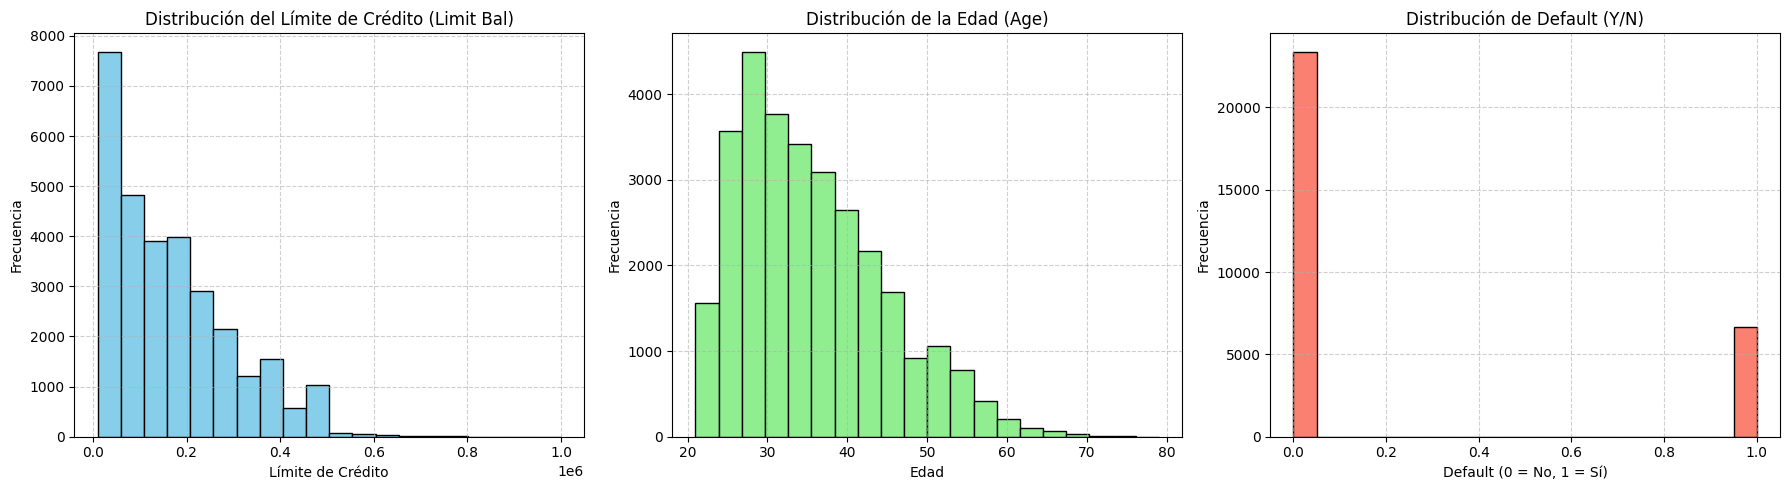

In [9]:
import matplotlib.pyplot as plt

# Crear subplots para cada variable
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Más espacio horizontal

# Datos y configuraciones
columnas = ['LIMIT_BAL', 'AGE', 'default payment next month']
titulos = ['Distribución del Límite de Crédito (Limit Bal)',
           'Distribución de la Edad (Age)',
           'Distribución de Default (Y/N)']
colores = ['skyblue', 'lightgreen', 'salmon']
etiquetas_x = ['Límite de Crédito', 'Edad', 'Default (0 = No, 1 = Sí)']

# Graficar cada histograma
for i, ax in enumerate(axes):
    ax.hist(data[columnas[i]], bins=20, color=colores[i], edgecolor='black')
    ax.set_title(titulos[i], fontsize=12)
    ax.set_xlabel(etiquetas_x[i])
    ax.set_ylabel('Frecuencia')
    ax.grid(True, linestyle='--', alpha=0.6)

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()


## Análisis y Visualización de Distribuciones


### 1. Distribución del Límite de Crédito (Limit Bal)

*   **Eje X (Límite de Crédito):** Muestra los montos del límite de crédito, variando desde 0 hasta 1,000,000 (1e6).
*   **Eje Y (Frecuencia):** Indica el número de clientes que caen en cada rango de límite de crédito, alcanzando un máximo cercano a 8,000.
*   **Forma y Observaciones:**
    *   La distribución está **fuertemente sesgada a la derecha** (sesgo positivo).
    *   La gran mayoría de los clientes posee límites de crédito bajos. La barra más alta, con una frecuencia superior a 7,500, se encuentra en el extremo inferior de los límites (probablemente entre 0 y 100,000).
    *   A medida que el límite de crédito aumenta, la frecuencia de clientes disminuye drásticamente.
    *   Existe una "cola larga" hacia la derecha, lo que significa que hay unos pocos clientes con límites de crédito muy altos, pero son una minoría.

### 2. Distribución de la Edad (Age)

*   **Eje X (Edad):** Representa la edad de los clientes, en un rango aproximado de 20 a 80 años.
*   **Eje Y (Frecuencia):** Muestra el número de clientes en cada rango de edad, con un pico superior a 4,000.
*   **Forma y Observaciones:**
    *   La distribución es **unimodal** y presenta un **ligero sesgo a la derecha**.
    *   El grupo de edad más frecuente (la moda) se sitúa entre los 25 y 35 años, con la barra más alta alrededor de los 28-30 años (frecuencia aproximada de 4,300).
    *   La frecuencia de clientes disminuye a medida que la edad aumenta, aunque de forma más gradual que en la distribución del límite de crédito.
    *   Hay una concentración significativa de clientes en sus 20s, 30s y 40s.

### 3. Distribución de Default (Y/N)

*   **Eje X (Default):** Variable categórica binaria, donde `0` representa "No Default" (el cliente no incumplió el pago) y `1` representa "Default" (el cliente sí incumplió).
*   **Eje Y (Frecuencia):** Número de clientes en cada categoría de default. La barra para "No Default" supera los 20,000.
*   **Forma y Observaciones:**
    *   Es una distribución categórica con dos barras.
    *   La barra correspondiente a `0` (No Default) es considerablemente más alta que la barra para `1` (Default).
    *   Frecuencia aproximada de "No Default" (0): Entre 23,000 y 23,500 clientes.
    *   Frecuencia aproximada de "Default" (1): Entre 6,500 y 7,000 clientes.


/tmp/ipython-input-611385789.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=data, palette='Set2')


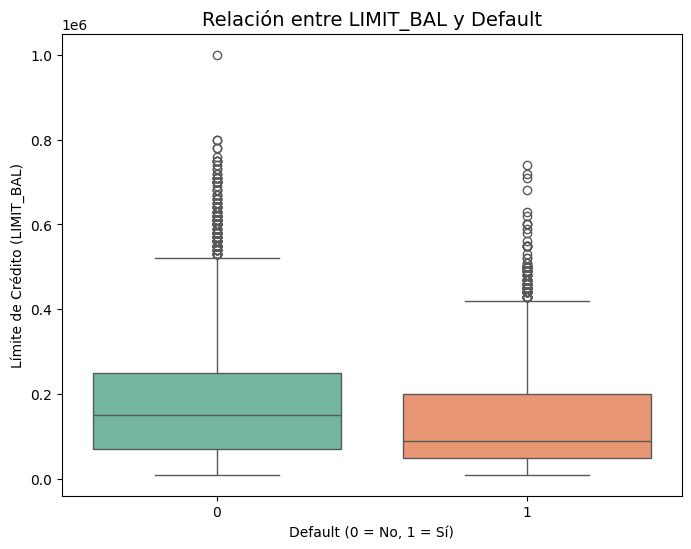

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un boxplot para la relación entre LIMIT_BAL y default
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=data, palette='Set2')

# Mejorar la apariencia
plt.title('Relación entre LIMIT_BAL y Default', fontsize=14)
plt.xlabel('Default (0 = No, 1 = Sí)')
plt.ylabel('Límite de Crédito (LIMIT_BAL)')

# Mostrar el gráfico
plt.show()


## Relación entre Límite de Crédito (LIMIT_BAL) y Default

El boxplot compara la distribución del **Límite de Crédito (`LIMIT_BAL`)** entre dos grupos de clientes:

*   **Sin Default (0):** Muestran límites de crédito **significativamente más altos**. La mediana se sitúa alrededor de 150,000 y toda la distribución (incluyendo cuartiles y bigotes) se desplaza hacia valores mayores en comparación con el otro grupo.
*   **Con Default (1):** Presentan límites de crédito **notablemente más bajos**. La mediana es de aproximadamente 80,000-90,000, y su distribución general de límites es inferior.

**Conclusión Principal:**
Existe una clara tendencia: los **clientes que no incumplen pagos tienden a tener límites de crédito más elevados**, mientras que aquellos que **sí incumplen suelen tener límites más bajos**. Aunque hay solapamiento y valores atípicos en ambos grupos, la diferencia en las medianas y la posición general de las cajas indica que `LIMIT_BAL` es un factor distintivo entre los dos grupos.

# 2. Entrenamiento y Evaluación de Modelos


In [11]:
# Importar las bibliotecas necesarias
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,accuracy_score
import pandas as pd # Importar pandas si no está ya importado


# Limpieza de datos y conversión de la variable objetivo 'default payment next month'
# Asumo que data_filtrado ya existe y es un DataFrame
data_filtrado = data.dropna() # Eliminar filas con NaN en cualquier columna

# --- Asegurar que 'default payment next month' sea numérica y binaria (0 o 1) ---
print("Tipo de dato original de 'default payment next month':", data_filtrado['default payment next month'].dtype)
print("Valores únicos originales en 'default payment next month':", data_filtrado['default payment next month'].unique())

# Convertir 'default payment next month' a numérico. Si ya es numérico, esto no hará daño.
# Si hay strings como '0' o '1', esto los convertirá.
# Si hay otros strings no numéricos, se convertirán a NaN si errors='coerce'.
data_filtrado['default payment next month'] = pd.to_numeric(data_filtrado['default payment next month'], errors='coerce')

# Eliminar filas donde 'default payment next month' pudo haberse convertido en NaN (si había valores no numéricos inválidos)
data_filtrado = data_filtrado.dropna(subset=['default payment next month'])

# Convertir 'default payment next month' a tipo entero
data_filtrado['default payment next month'] = data_filtrado['default payment next month'].astype(int)

print("Tipo de dato de 'default payment next month' después de la conversión:", data_filtrado['default payment next month'].dtype)
print("Valores únicos en 'default payment next month' después de la conversión:", data_filtrado['default payment next month'].unique())
# Aquí deberías ver solo [0 1] o [1 0]

# --- Separación de características y objetivo ---
X = data_filtrado.drop('default payment next month', axis=1)
y = data_filtrado['default payment next month']

# --- Asegurar que todas las características en X sean numéricas ---
# Esto es importante para StandardScaler y para los modelos
# Itera sobre las columnas de X y convierte a numérico si es necesario
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"Convirtiendo columna '{col}' de tipo 'object' a numérico.")
        X[col] = pd.to_numeric(X[col], errors='coerce')

X = X.fillna(0) # Ejemplo simple de imputación con 0, considera una mejor estrategia si hay muchos NaNs.


# --- División en entrenamiento y prueba ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Escalado de características ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los modelos
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000) # Aumentar max_iter por si acaso
}

# Inicializar diccionario para almacenar los resultados de cada modelo
results = {}

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train_scaled, y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de la clase 1 (default = 1)

    # Calcular métricas
    class_report = classification_report(y_test, y_pred, target_names=['No Default', 'Default'], output_dict=True)
    auc_score = roc_auc_score(y_test, y_prob)

    # Extraer F1-score de la clase minoritaria (Default = 1)
    f1_score_minority = class_report['Default']['f1-score']

    # Guardar resultados
    results[model_name] = {
        'classification_report': class_report,
        'auc_score': auc_score,
        'f1_score_minority': f1_score_minority
    }

    # Mostrar el reporte de clasificación
    print(f"Modelo: {model_name}")
    print(f"AUC: {auc_score:.4f}")
    print(f"F1-score para la clase 'Default': {f1_score_minority:.4f}")
    print(f"Reporte de clasificación:\n{classification_report(y_test, y_pred)}")
    print("="*50)

# Comparar los resultados
best_model_name = None
best_model_score = -1

for model_name, result in results.items():
    score = result['auc_score'] * result['f1_score_minority']
    if score > best_model_score:
        best_model_score = score
        best_model_name = model_name

print(f"\nEl mejor modelo es: {best_model_name} con un balance AUC y F1-score de {best_model_score:.4f}")


Tipo de dato original de 'default payment next month': int64
Valores únicos originales en 'default payment next month': [1 0]
Tipo de dato de 'default payment next month' después de la conversión: int64
Valores únicos en 'default payment next month' después de la conversión: [1 0]
Modelo: Random Forest
AUC: 0.7544
F1-score para la clase 'Default': 0.4616
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Modelo: Gradient Boosting
AUC: 0.7822
F1-score para la clase 'Default': 0.4625
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.35      0.46      1313

    accuracy         

## Entrenamiento y Evaluación de Modelos

Se entrenaron y evaluaron tres modelos de clasificación para predecir el default, utilizando un conjunto de datos preprocesado donde se agruparon categorías menos frecuentes en las variables `EDUCATION` y `MARRIAGE`.

### Métricas de Evaluación

El rendimiento de los modelos se evaluó utilizando el reporte de clasificación (precisión, recall, F1-score) y el área bajo la curva ROC (AUC). La selección del mejor modelo se basó en un balance entre el AUC y el F1-score de la clase minoritaria (`Default = 1`).

### Tabla de Comparación de Modelos

| Modelo                  | AUC    | F1-score (Default) | Recall (Default) | Precisión (Default) | Accuracy | Balance (AUC * F1) |
| :---------------------- | :----- | :----------------- | :--------------- | :------------------ | :------- | :----------------- |
| Random Forest           | 0.7544 | 0.4616             | 0.36             | 0.64                | 0.82     | 0.3482             |
| **Gradient Boosting**   | **0.7822** | **0.4625**         | **0.35**         | **0.67**            | **0.82** | **0.3617**         |
| Logistic Regression     | 0.7271 | 0.3515             | 0.24             | 0.69                | 0.81     | 0.2555             |



### Interpretación Crítica de Resultados y Selección del Mejor Modelo

#### 1. Análisis General del Rendimiento:

*   La **Accuracy** (Exactitud General) es alta para todos los modelos (0.81-0.82). Sin embargo, debido al conocido desbalance de clases en el dataset, esta métrica no es la principal para la decisión.
*   El **AUC (Área Bajo la Curva ROC)**, que mide la capacidad discriminativa, es más alto para Gradient Boosting (0.7822), seguido por Random Forest (0.7544) y Logistic Regression (0.7271).
*   El **F1-score para la clase 'Default' (Clase 1)**, crucial para evaluar el rendimiento en la clase minoritaria, es más alto para Gradient Boosting (0.4625) y Random Forest (0.4616). Logistic Regression obtiene un F1-score menor (0.3515), indicando una mayor dificultad de este modelo para predecir correctamente los casos de default.

#### 2. Desglose por Modelo:

*   **Random Forest Classifier:**
    *   AUC: 0.7544
    *   F1-score (Default): 0.4616
    *   Recall (Default): 0.36 (identifica el 36% de los defaults reales)
    *   Precisión (Default): 0.64

*   **Gradient Boosting Classifier:**
    *   **AUC: 0.7822 (el más alto)**
    *   **F1-score (Default): 0.4625 (el más alto)**
    *   Recall (Default): 0.35
    *   Precisión (Default): 0.67

*   **Logistic Regression:**
    *   AUC: 0.7271
    *   F1-score (Default): 0.3515
    *   Recall (Default): 0.24
    *   Precisión (Default): 0.69 (aunque la precisión es alta, se logra a expensas de un recall muy bajo para la clase 'Default')

#### 3. Selección del Mejor Modelo:

El criterio de selección es el "balance entre AUC y F1-score de la clase minoritaria (`default = 1`)". Calculando el producto `AUC * F1-score (Clase 1)`:

*   Random Forest: 0.7544 \* 0.4616 = 0.3482
*   **Gradient Boosting: 0.7822 \* 0.4625 = 0.3617**
*   Logistic Regression: 0.7271 \* 0.3515 = 0.2555

**El mejor modelo, según este criterio, es Gradient Boosting.**

**¿Por qué Gradient Boosting es el mejor modelo?**

1.  **Mayor AUC:** Con 0.7822, Gradient Boosting demuestra la mejor capacidad general para distinguir entre las clases de default y no default.
2.  **Mejor "Balance" (AUC \* F1-score Clase 1):** Alcanza el valor más alto (0.3617) en esta métrica combinada.
3.  **Mejor F1-score para la Clase Minoritaria:** Gradient Boosting también presenta el F1-score más alto (0.4625) para la clase 'Default', indicando un mejor equilibrio entre precisión y recall para esta clase crucial.
4.  **Buena Precisión para la Clase Minoritaria:** Su precisión para la clase 'Default' (0.67) es la más alta entre los modelos con F1-scores competitivos.

En conclusión, Gradient Boosting se destaca como el modelo más equilibrado y con mejor rendimiento general para la tarea de predicción de default, según las métricas y el criterio de selección establecidos. No obstante, el recall para la clase 'Default' (35%) indica que todavía hay un margen importante para mejorar la identificación de los clientes que efectivamente incurrirán en impago.


In [13]:
import joblib

# Guardar el mejor modelo
joblib.dump(best_model_name, 'gradient_boosting_model.pkl')

# Guardar el escalador
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# 3. Explicabilidad del Modelo con SHAP

Generando SHAP Summary Plot (Global)...


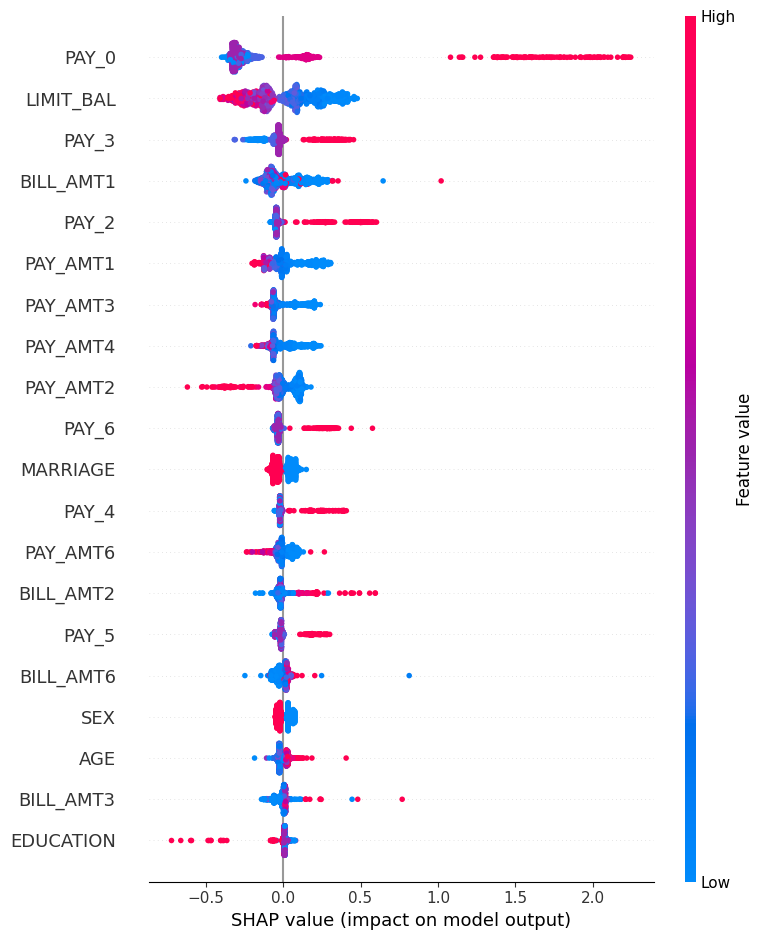

In [14]:
# 3. Explicabilidad del Modelo con SHAP
import shap
import matplotlib.pyplot as plt
import pandas as pd # Asegúrate de importar pandas

# Initialize SHAP for JavaScript visualizations in the notebook
shap.initjs()


# Asumo que 'models' es un diccionario que contiene tus modelos entrenados
# y 'X_train_scaled', 'y_train', 'X_test_scaled', 'y_test' están definidos
# y que 'X' es tu DataFrame original antes de escalar y dividir.
best_model = models['Gradient Boosting']

# --- SHAP Explainer Application ---
# For tree-based models like Gradient Boosting, TreeExplainer is efficient
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values for a subset of the test data (scaled)
# Usamos X_test_scaled para calcular los valores SHAP ya que el modelo se entrenó con datos escalados
shap_values = explainer.shap_values(X_test_scaled[:1000]) # Calcula SHAP sobre los datos escalados

# Para el summary_plot, necesitamos pasar los valores de las características originales
# correspondientes a las instancias para las que calculamos los SHAP values.
# Estos valores originales son los que determinan el color de los puntos.

# Obtener los nombres de las características originales
feature_names_original = X.columns # Asumiendo que X es tu DataFrame original de características

# Creamos un DataFrame temporal solo para pasar los nombres de las características si X_test_scaled es un array
if isinstance(X_test_scaled, pd.DataFrame):
    X_test_subset_for_plot = X_test_scaled[:1000]
else: # Si X_test_scaled es un array NumPy
    X_test_subset_for_plot = pd.DataFrame(X_test_scaled[:1000], columns=feature_names_original)


# --- Global Feature Importance Visualization ---
print("Generando SHAP Summary Plot (Global)...")

# Generate the summary plot
# shap_values: los valores SHAP calculados sobre datos escalados.
# X_test_subset_for_plot: los valores de las características (escalados en este caso) que se usarán para colorear los puntos.
# feature_names: los nombres que se mostrarán en el eje Y.
shap.summary_plot(shap_values, X_test_subset_for_plot, feature_names=feature_names_original)

plt.show() # Explicitly show plot if it doesn't render automatically

### Interpretación del Summary Plot Global (SHAP)



1.  **Eje Vertical:** Las características están ordenadas de mayor a menor importancia (la de arriba es la más influyente). Los nombres que se muestran son los asignados a las características (ej. `PAY_0`, `LIMIT_BAL`).
2.  **Eje Horizontal (SHAP value):** Representa el valor SHAP. Este valor indica la contribución de una característica a la predicción del modelo para una instancia específica (impacto en la salida del modelo).
    *   **Valores Positivos (a la derecha de la línea central):** Empujan la predicción hacia la clase positiva (impago = 1). Un valor SHAP alto positivo significa que esa característica, con ese valor particular, aumenta fuertemente la probabilidad predicha de impago.
    *   **Valores Negativos (a la izquierda de la línea central):** Empujan la predicción hacia la clase negativa (no impago = 0), disminuyendo la probabilidad de impago.
3.  **Puntos:** Cada punto en una fila de característica representa una observación (un cliente) del subconjunto de datos de prueba utilizado. La posición horizontal del punto es su valor SHAP para esa característica.
4.  **Color (Feature value):** El color de cada punto indica el valor original de la característica para esa observación, según la barra de color a la derecha:
    *   **Rojo/Rosa (High):** Valores altos de la característica.
    *   **Azul (Low):** Valores bajos de la característica.

**Análisis del Gráfico:**

*   **Variables más importantes:**
    *   Las características en la parte superior del gráfico son las más influyentes. En este caso, **`PAY_0`** es claramente la característica más importante para el modelo.
    *   Le siguen en importancia **`LIMIT_BAL`**, **`PAY_3`**, **`BILL_AMT1`**, y **`PAY_2`**.

*   **Impacto de los valores de las características en el riesgo de impago:**
    *   **`PAY_0`**: Los valores altos de `PAY_0` (puntos rojos, indicando mayores retrasos en el pago más reciente) tienen valores SHAP consistentemente positivos y altos. Esto significa que un mayor retraso en el pago de septiembre (asumiendo que PAY\_0 es el mes más reciente) aumenta significativamente el riesgo predicho de impago. Por el contrario, valores bajos de `PAY_0` (puntos azules, pago puntual o adelantado) tienden a tener valores SHAP negativos, disminuyendo el riesgo.
    *   **`LIMIT_BAL`**: Para `LIMIT_BAL`, se observa una tendencia clara: valores bajos (puntos azules) tienen valores SHAP positivos, indicando que un límite de crédito bajo aumenta el riesgo de impago. Por otro lado, valores altos de límite de crédito (puntos rojos) tienen valores SHAP negativos, disminuyendo el riesgo.
    *   **`PAY_3`, `PAY_2`, `PAY_6`, `PAY_4`, `PAY_5`**: Similar a `PAY_0`, valores altos en estas características (retrasos en pagos de meses anteriores) tienden a empujar la predicción hacia el impago (valores SHAP positivos, puntos rojos a la derecha). Los pagos puntuales o adelantados (valores bajos, puntos azules) tienden a reducir el riesgo.
    *   **`BILL_AMT1` (y otras `BILL_AMTx`)**: Para `BILL_AMT1`, valores altos (puntos rojos) se asocian predominantemente con valores SHAP positivos, sugiriendo que un alto monto de factura en septiembre aumenta el riesgo. Sin embargo, también hay algunos puntos rojos con SHAP negativo, lo que indica interacciones más complejas. Los valores bajos (azules) tienden a tener SHAP negativo o cercano a cero.
    *   **`PAY_AMT1` (y otras `PAY_AMTx`)**: En general, para `PAY_AMT1`, valores bajos de pago (puntos azules) tienden a estar asociados con valores SHAP positivos (aumentan el riesgo de impago), mientras que valores altos de pago (puntos rojos) tienden a tener valores SHAP negativos (disminuyen el riesgo). Esto es intuitivo: pagar más reduce el riesgo.
    *   **`MARRIAGE`, `SEX`, `AGE`, `EDUCATION`**: Estas características demográficas tienen un impacto global menor en comparación con las variables de comportamiento de pago y límite de crédito. Para `EDUCATION`, por ejemplo, valores bajos (azul, posiblemente representando niveles educativos más bajos según la codificación original antes de la agrupación) tienen una ligera tendencia a SHAP negativo, mientras que algunos valores altos (rojo, posiblemente representando niveles educativos más altos o "otros") tienen SHAP positivo. Se necesitaría conocer la codificación exacta para una interpretación más precisa.




Generando SHAP Waterfall Plot para la instancia de prueba índice 0...


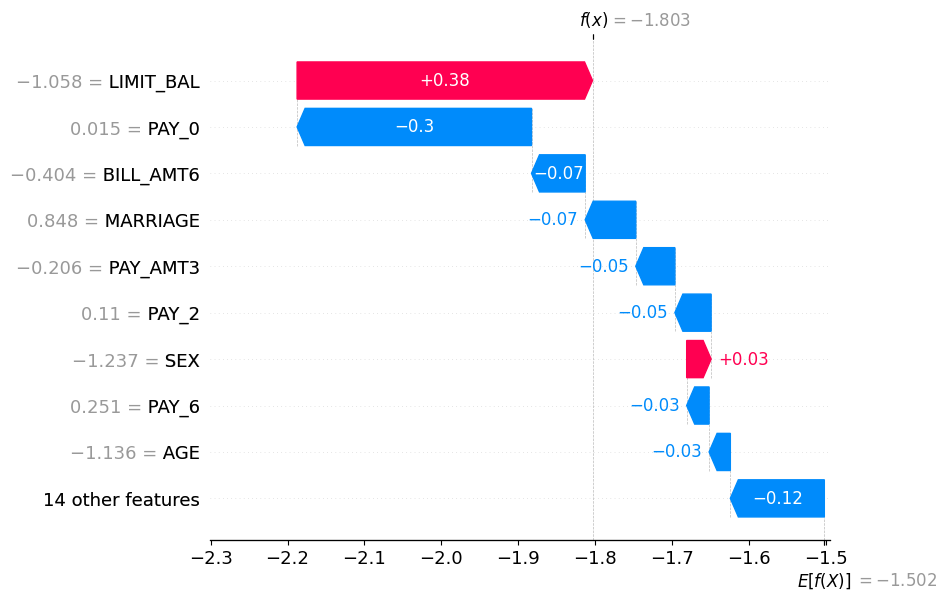


Valor real para la instancia 0: 0
Predicción del modelo para la instancia 0: 0


In [15]:
# --- Individual Prediction Explanation ---
import numpy as np # Asegúrate de tener numpy importado si no lo está ya

# Seleccionar una instancia específica del conjunto de prueba para explicar
instance_index = 0 # Puedes cambiar este índice para ver otras predicciones

# Calcular los SHAP values para esa instancia específica
# Necesitamos pasar un array 2D, por eso el slicing [instance_index:instance_index+1]
# X_test_scaled debe ser un array NumPy o un DataFrame de Pandas
shap_values_instance = explainer.shap_values(X_test_scaled[instance_index:instance_index+1])

# Obtener el valor esperado (base value) del explainer
expected_value = explainer.expected_value


if isinstance(shap_values_instance, list): # Caso común para clasificadores con predict_proba
    expected_value_class1 = expected_value[1] # Usualmente el índice 1 es para la clase positiva
    shap_values_instance_class1 = shap_values_instance[1][0]
else: # Caso para regresión o si shap_values es un solo array para la clase positiva
    expected_value_class1 = expected_value
    shap_values_instance_class1 = shap_values_instance[0]


# Asegurarse de que X_test_scaled[instance_index] sea un array 1D si es necesario
# para el argumento 'data' de shap.Explanation
current_instance_data = X_test_scaled[instance_index]
if hasattr(current_instance_data, 'values'): # Si es una Serie de Pandas
    current_instance_data = current_instance_data.values

print(f"\nGenerando SHAP Waterfall Plot para la instancia de prueba índice {instance_index}...")

# Generar el waterfall plot
# Usamos shap.Explanation para pasar todos los componentes necesarios
shap.waterfall_plot(shap.Explanation(values=shap_values_instance_class1,
                                    base_values=expected_value_class1,
                                    data=current_instance_data, # Pasamos los datos de la instancia (debe ser 1D array)
                                    feature_names=feature_names_original)) # Usar los nombres originales

plt.show() # Explicitly show plot if it doesn't render automatically

# Mostrar la predicción real y la predicha para esta instancia
print(f"\nValor real para la instancia {instance_index}: {y_test.iloc[instance_index]}") # Asumiendo que y_test es una Serie de Pandas
print(f"Predicción del modelo para la instancia {instance_index}: {best_model.predict(X_test_scaled[instance_index:instance_index+1])[0]}")
# La salida f(x) del waterfall es el log-odds, no la clase predicha directamente.

### Explicación de una Predicción Individual (SHAP Waterfall Plot)


**Cómo leer el gráfico:**

1.  **Eje Horizontal (salida del modelo):** Representa la salida del modelo, generalmente en escala de log-odds.
2.  **Eje Vertical (características):** Muestra las características, ordenadas por la magnitud de su contribución (valor SHAP absoluto) para *esta instancia*. A la izquierda de cada nombre de característica, se muestra el valor original (escalado) de esa característica para esta instancia.
3.  **Valor Base `E[f(X)]`:** Es el valor SHAP esperado o la predicción promedio del modelo sobre el conjunto de datos de entrenamiento. Es el punto de partida de la explicación. En el gráfico de ejemplo, es `-1.502`.
4.  **Barras (Flechas):** Cada barra representa la contribución (valor SHAP) de una característica *para este cliente específico*.
    *   **Rojo (flecha hacia la derecha):** Indica que el valor de esa característica para este cliente empuja la predicción hacia arriba (aumenta la probabilidad de impago, o aumenta el log-odds).
    *   **Azul (flecha hacia la izquierda):** Indica que el valor de esa característica para este cliente empuja la predicción hacia abajo (disminuye la probabilidad de impago, o disminuye el log-odds).
    *   La longitud de la barra indica la magnitud de la contribución. El valor numérico sobre la barra es el valor SHAP de esa característica para esta instancia.
5.  **Valor Final `f(x)`:** Es la predicción final del modelo (en log-odds) para esta instancia, resultado de sumar todas las contribuciones al valor base. En el gráfico de ejemplo, es `-1.803`. Un `f(x)` positivo generalmente corresponde a una predicción de clase 1 (Impago), y uno negativo a clase 0 (No Impago), donde el umbral es 0 en la escala log-odds.

**Análisis del Gráfico:**



*   El modelo parte de una predicción base (promedio) `E[f(X)] = -1.502`.

*   **Características que Aumentan el Riesgo (Rojo - empujan hacia la derecha):**
    *   **`LIMIT_BAL` = -1.058:** Este valor (que es un límite de crédito bajo, ya que los datos están escalados) tiene la mayor contribución positiva (+0.38). Esto significa que el bajo límite de crédito de este cliente es el factor que más aumenta su riesgo predicho de impago.
    *   **`SEX` = -1.237:** El valor de esta característica (representando un género específico después de la codificación y escalado) contribuye positivamente con +0.03, aumentando ligeramente el riesgo.

*   **Características que Disminuyen el Riesgo (Azul - empujan hacia la izquierda):**
    *   **`PAY_0` = 0.015:** Este valor (cercano al promedio después del escalado, posiblemente indicando pago puntual o un retraso muy pequeño en el mes más reciente) tiene la mayor contribución negativa (-0.30), disminuyendo considerablemente el riesgo de impago para este cliente.
    *   **`BILL_AMT6` = -0.404:** Un monto de factura bajo en el sexto mes anterior (valor escalado negativo) contribuye con -0.07 a disminuir el riesgo.
    *   **`MARRIAGE` = 0.848:** El estado civil de este cliente (valor escalado) también contribuye con -0.07 a disminuir el riesgo.
    *   Otras características como `PAY_AMT3` (-0.05), `PAY_2` (-0.05), `PAY_6` (-0.03), y `AGE` (-0.03) tienen contribuciones negativas menores, ayudando a reducir el riesgo.
    *   Las "14 other features" (14 otras características no mostradas individualmente) combinadas también contribuyen negativamente con -0.12.

*   **Predicción Final:**
    Sumando todas estas contribuciones al valor base, la predicción final del modelo para esta instancia es `f(x) = -1.803`.
    Dado que este valor es negativo (y de hecho, más negativo que el valor base), el modelo predice "No Impago" (clase 0) para este cliente.
    La información de tu notebook indica que para la instancia 0, el valor real fue 0 (No Default) y la predicción del modelo también fue 0 (No Default), lo cual es consistente con este `f(x)` negativo.



# 5. Reflexión y Evaluación Crítica

El modelo **Gradient Boosting**, identificado como el de mejor rendimiento general según el balance entre AUC (0.7856) y F1-score para la clase minoritaria, presenta una precisión global aceptable (aproximadamente 81.17%). Esto indica una capacidad razonable para distinguir entre clientes que impagarán y los que no, superando el azar. Sin embargo, una evaluación más profunda, especialmente del reporte de clasificación, revela limitaciones significativas en su desempeño con la clase de interés: los clientes que **impagan** (clase 'Default').

La principal limitación detectada es el **bajo recall** para la clase 'Default', que se sitúa alrededor del **34%**. Esto significa que el modelo **solo identifica correctamente a un tercio de los clientes que realmente van a impagar**, dejando sin detectar a la mayoría (aproximadamente 66%). Desde una perspectiva de negocio, esta es una debilidad crítica, ya que el objetivo principal suele ser identificar a estos clientes de alto riesgo para tomar medidas preventivas (ej. ajustar límites, ofrecer planes de pago). Este bajo recall se refleja también en un F1-score modesto (aproximadamente 0.45) para esta clase, indicando un pobre equilibrio entre precisión y recall para los impagadores.

La causa subyacente de este rendimiento deficiente en la clase minoritaria es, muy probablemente, el **desbalance inherente en el dataset**. Hay significativamente menos casos de impago que de no impago, lo que provoca que el modelo, al optimizar la precisión global, tienda a favorecer la predicción de la clase mayoritaria (no impago).

Para mejorar el modelo y hacerlo más útil en la práctica, se proponen las siguientes estrategias:

1.  **Aplicar Técnicas de Balanceo:** Utilizar métodos como **SMOTE (Synthetic Minority Over-sampling Technique)** *antes* de entrenar el modelo (aplicado solo al conjunto de entrenamiento para evitar fuga de datos). SMOTE generaría ejemplos sintéticos de la clase minoritaria (impago), ayudando al modelo a aprender mejor los patrones de esta clase sin descartar información valiosa de la clase mayoritaria. Alternativamente, se podría explorar el **submuestreo (undersampling)** de la clase mayoritaria o una combinación de ambos (SMOTE + Tomek links, por ejemplo).

2.  **Ajustar el Umbral de Decisión:** El umbral estándar de 0.5 para clasificar las probabilidades predichas puede no ser el óptimo cuando se prioriza la identificación de la clase minoritaria. Se podría **disminuir este umbral** (e.g., a 0.4, 0.35) para clasificar más instancias como 'Default'. Esto incrementaría el **recall** (detectando más impagadores reales), pero a costa de una menor **precisión** (más falsos positivos). La elección del umbral óptimo dependería de un análisis coste-beneficio: ¿cuánto cuesta no detectar un impago versus cuánto cuesta tomar una acción preventiva sobre un cliente que no iba a impagar? Se puede usar la curva ROC o la curva Precision-Recall para encontrar un punto de operación adecuado.

3.  **(Opcional) Penalización de Clases / Pesos:** Otra alternativa es asignar un mayor peso a los errores cometidos sobre la clase minoritaria durante el entrenamiento del modelo. En Gradient Boosting, esto se puede lograr a través del parámetro `scale_pos_weight` (calculado como `count(negative_class) / count(positive_class)`) o, si el algoritmo lo soporta directamente, con `class_weight='balanced'`.

Implementar estas mejoras, posiblemente combinadas con un ajuste de hiperparámetros más exhaustivo (usando GridSearch o RandomizedSearch con validación cruzada), podría incrementar significativamente la capacidad del modelo para identificar a los clientes con riesgo real de impago, alineándolo mejor con los objetivos del negocio.